<a href="https://colab.research.google.com/github/andygoosh/samsung/blob/master/Arxiv_title_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
from google.colab import files, drive
import pandas as pd
import tensorflow as tf

import torch
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'cpu')
# V100 (7~7.8 TF) -> P100 (4.7~5.3 TF) -> K80 (1.87+ TF, LoNi) -> T4 (~0.25 TF, Andy/Nik) -> P6 (Andy/Goosh)
    
gpath = Path('/content/gdrive')
drive.mount(str(gpath))
data_file = gpath / 'My Drive/Samsung' / 'train.csv.zip'

Tesla K80


KeyboardInterrupt: ignored

In [0]:
import zipfile
from collections import Counter
from io import BytesIO
from urllib.request import urlopen
import tensorflow as tf

def zipfile_to_corpus(corpus_file_name):
  with zipfile.ZipFile(BytesIO(urlopen(corpus_file_name).read())) as f:
      data = tf.compat.as_str(f.read(f.namelist()[0]))

# from torchtext.data.metrics import bleu_score

In [0]:
train_df = pd.read_csv(data_file)
train_df

,abstract,title
0,we consider the problem of utility maximizatio...,on optimal investment with processes of long o...
1,in this paper we provide an explicit formula f...,boolean complexes for ferrers graphs
2,"kinesin-5, also known as eg5 in vertebrates is...",relative velocity of sliding of microtubules b...
3,we discuss the transition paths in a coupled b...,bifurcation of transition paths induced by cou...
4,two types of room temperature detectors of ter...,all-electric detectors of the polarization sta...
...,...,...
134995,we consider a minimalistic dynamic model of th...,randomly evolving idiotypic networks: structur...
134996,this is an extended version of a communication...,noncommutative generalization of su(n)-princip...
134997,"in this paper, a new method was developed for ...",initialization of multilayer forecasting artif...
134998,we propose a new approach to analyze data that...,principal arc analysis on direct product manif...


Number of times "-" used: 486754


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


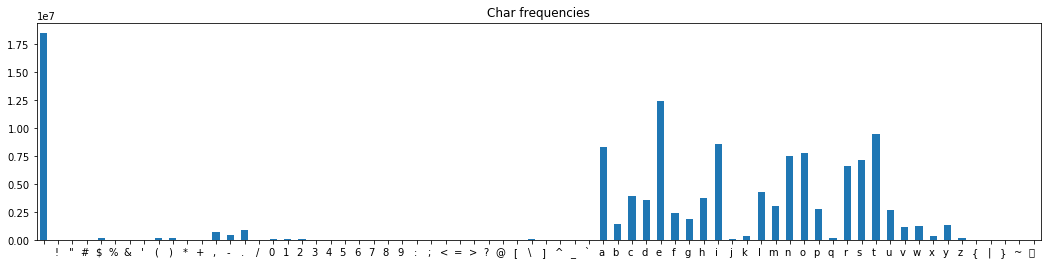

In [0]:
chars = Counter()

for row in train_df.abstract:
  chars += Counter(row)

s = sorted(chars.items())
pd.DataFrame(s, index=(e[0]+' ' for e in s)).plot.bar(figsize=(18,4), rot=0, title = 'Char frequencies', legend=False)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


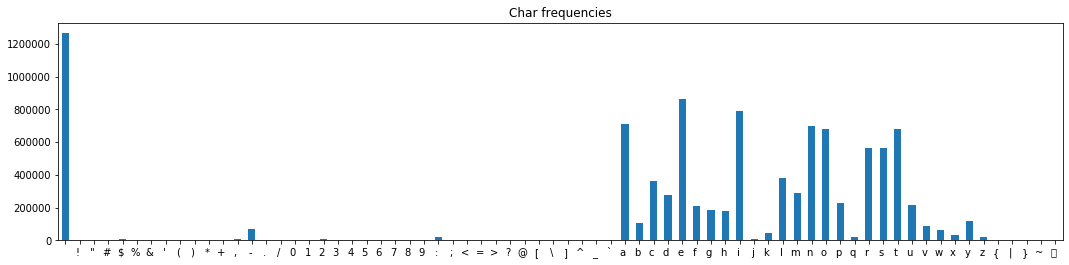

In [0]:
chars = Counter()

for row in train_df.title:
  chars += Counter(row)

s = sorted(chars.items())
pd.DataFrame(s, index=(e[0]+' ' for e in s)).plot.bar(figsize=(18,4), rot=0, title = 'Char frequencies', legend=False);